In [67]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from numpy import ma

# 1 Load Data

## 1.1 Test writing, reading csv files

In [5]:
#Create toy dataframe with numbers, strings, missing values
toyNum = [1,2,3,4,5]
toyChar = ['a','b','c','d','e']
toyNull = [np.nan, np.nan, np.nan, np.nan, np.nan]
toyDf = pd.DataFrame.from_dict({'num': toyNum, 'string': toyChar, 'null': toyNull})

#Write to local csv file
toyDf.to_csv('toyDf.csv', sep='\t', encoding='utf-8', index=False)

#Read local csv file
toyDf2 = pd.read_csv("C:\\Users\\Arihan Jalan\\INFO 371\\toyDf.csv", sep='\t')

#Print whether created, imported df are the same
print("Created DF in memory matches DF written to disk:", toyDf.equals(toyDf2))

Created DF in memory matches DF written to disk: True


## 1.2 Load rotten tomatoes data

In [6]:
#Read Rotten Tomatoes dataset
df = pd.read_csv("D:\\OneDrive\\University of Washington Seattle\\Year 4 Quarter 2 (Winter)\\INFO 371\\Problem Set\\PS6\\rotten-tomatoes.csv", sep=',')

## 1.3 Split df into train, test sets

In [7]:
#Split dataset into 80-20 train-test
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 1)

#Ensure train size looks alright
print('Size of training set:', len(df_train))
print('Size of training relative to full dataset:', np.round(len(df_train) / len(df), 2))

Size of training set: 10753
Size of training relative to full dataset: 0.8


## 1.4 Store test on drive; delete from memory

In [8]:
#Write df_test to storage; note- stored within C:\\Users\\Arihan Jalan\\INFO 371\\
df_test.to_csv('rotten-tomatoes-test.csv', sep='\t', encoding='utf-8', index=False)

#Delete from memory
del df_test

# 2 Explore and clean the data

## 2.1 Sample data

In [9]:
#Return 5 random rows from training data
df_train.sample(n=5, random_state = 1)

,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
9924,Peter Rainer,rotten,120633,http://www.newyorkmetro.com/nymetro/movies/rev...,New York Magazine,I'm all for films that don't flow from the usu...,2000-01-01 00:00:00,10500,A Civil Action
1873,Bosley Crowther,fresh,61809,http://movies2.nytimes.com/mem/movies/review.h...,New York Times,"Excellent quasidocumentary, which sends shiver...",2003-05-20 00:00:00,12934,In Cold Blood
4979,Amy Taubin,fresh,89881,http://www.villagevoice.com/issues/0033/taubin...,Village Voice,"For aficionados of the war movie, the western,...",2008-07-01 00:00:00,15203,Ran
2858,Jonathan Rosenbaum,fresh,117608,http://onfilm.chicagoreader.com/movies/capsule...,Chicago Reader,[A] celebration of high jinks.,2008-05-19 00:00:00,10970,Sgt. Bilko
4615,Teresa Wiltz,rotten,362269,http://www.washingtonpost.com/wp-dyn/articles/...,Washington Post,There's a flatness to the filmmaking; what's n...,2004-11-19 00:00:00,13114,Kinsey


## 2.2 Print variable names

In [12]:
#Prints column header names

#Extract array of column names
df_train_cols = df_train.columns

print("Variable names:")

#Iterate over them, printing them out
for name in df_train_cols:
    print("  *", name)

Variable names:
  * critic
  * fresh
  * imdb
  * link
  * publication
  * quote
  * review_date
  * rtid
  * title


## 2.3 Summary Table
Note- writeup says "maybe more like a bullet list". A table following the instructions will have some cols having NaN values for certain rows; so I'm instead having a bullet list for this section as suggested by the instructions.

### 2.3.a. Number of missing in fresh, quote

In [13]:
print("Number of missing values for 'fresh' column:", df_train['fresh'].isnull().sum())
print("Number of missing values for 'quote' column:", df_train['quote'].isnull().sum())

Number of missing values for 'fresh' column: 0
Number of missing values for 'quote' column: 0


### 2.3.b. Different possible values for fresh/rotten evaluations

In [14]:
#Extract Unique values for fresh column
arr_unique_fresh = df_train.fresh.unique()

#Iterate over array of unique values, printing them
print("Possible values within 'fresh' column:")
for name in arr_unique_fresh:
    print('   ', name)

Possible values within 'fresh' column:
    rotten
    fresh
    none


### 2.3.c. Counts for fresh / rotten evaluations

In [15]:
#Note- ...fresh').count() will return counts per col (how many cols correspond to fresh, none, rotten)
#df_train.groupby('fresh').size()   group by 'fresh' column; calculate size
#...).reset_index(name='counts')    reset index; add col. convert to dataframe
df_train.groupby('fresh').size().reset_index(name='counts')

,fresh,counts
0,fresh,6733
1,none,17
2,rotten,4003


### 2.3.d. Number of zero-length/whitespace quotes

In [16]:
#Create an array of values from quote column
arr_quote = df_train.quote.values.copy()

#Print number of quotes that are empty strings
print("Number of values in 'quote' column with empty string (zero length):", sum(arr_quote == ''))

#Remove white spaces by iterating through array
#AFTER- array has no whitespaces
for i in range(len(arr_quote)):
    arr_quote[i] = "".join(arr_quote[i].split())

#Print quotes that have whitespaces
print("Number of values in 'quote' column with white spaces:", sum(df_train.quote.values == ""))

Number of values in 'quote' column with empty string (zero length): 0
Number of values in 'quote' column with white spaces: 0


### 2.3.e. min-max-avg length of quotes

In [17]:
#Create an array of values from quote column
arr_quote = df_train.quote.values.copy()

#Create an array of quote string length
arr_quote_len = []
for i in range(len(arr_quote)):
    arr_quote_len.append(len(arr_quote[i]))
    
#Print min, max, avg length
print("Quote length in charachters")
print("")
print("Smallest quote length:", min(arr_quote_len))
print("Largest quote length: ", max(arr_quote_len))
print("Average quote length: ", np.round(np.mean(arr_quote_len), 3))

Quote length in charachters

Smallest quote length: 4
Largest quote length:  256
Average quote length:  121.133


### 2.3.f. How many reviews are in the data multiple times

In [18]:
#Duplicate rows for same quote, title, critic value
val_duplicate = len(df_train[df_train.duplicated(subset=['quote', 'title', 'critic'])])
print("Number of duplicate rows for data in 'quote', 'title', 'critic':", val_duplicate)

Number of duplicate rows for data in 'quote', 'title', 'critic': 403


## 2.4 Clean data

In [19]:
#Takes dataframe of movie reviews

#Returns copy of dataframe with
# * reset indexes, 
# * lowercase quotes, 
# * whitespaces in quotes replaced with single space, 

#Also, removes rows where-
# * 'fresh' = none
# * 'quote' = '' or is None
# * duplicate values
def cleanReviews(df):

    #Makes copy of df so changes don't effect sent one
    df_copy = df.copy()

    #BELOW CODE REMOVES FRESH=NONE AND QUOTE=EMPTY
    
    #Filter operation on data
    df_copy = df_copy[(df_copy.fresh != 'none') & (df_copy.quote != '') & (df_copy.quote != None)]

    #BELOW CODE REMOVES DUPLICATES
    
    #Removing duplicates by grouping by all columns
    df_copy = pd.DataFrame(df_copy.groupby(list(df_copy)).size().reset_index())

    #BELOW CODE CLEANS QUOTES

    #Cleaning data by removing punctuation, numbers, etc. from quotes
    df_copy.quote = df_copy.quote.str.lower()
    
    #Create an array of values from quote column
    arr_quote = df_copy.quote.values
    
    for i in range(len(arr_quote)):
        #Remove whitespaces
        arr_quote[i] = " ".join(arr_quote[i].split())

        #Remove punctuation
        arr_quote[i] = arr_quote[i].translate(str.maketrans('', '', string.punctuation))
        
    df_copy.quote = arr_quote
    
    return df_copy

def addFreshClass(df):
    Fresh = {'fresh': 1,'rotten': 0} 

    #Loop dataframe and write value where key matches
    fresh_yes = [Fresh[item] for item in df.fresh]

    #Append cancer diagnosis column
    df['fresh_yes'] = fresh_yes
    
    return df

In [20]:
#Clean data
df_train = addFreshClass(cleanReviews(df_train))

# 3 Naive Bayes

## 3.1 Ensure Familiar with Naive Bayes (Done)

## 3.2 Convert data into BOW (done through createBOWdataframe)
Note- instead of using a BOW; handling it in a different way.

In [35]:
#CREATE DF BOW
#Returns dataframe with columns-
# * word- the word token (e.g.- "it", "has", "the", "of")
# * word_rotten- the number of reviews/quotes labelled as rotten that contain the given word
# * word_fresh- the number of reviews/quotes labelled as fresh that contain the given word
# * p_word_fresh- given a quote labelled as fresh, the probability it will contain the given word
# * p_word_rotten- given a quote labelled as rotten, the probability it will contain the given word
# * p_log_word_fresh- log(p_word_fresh)
# * p_log_word_rotten- log(p_word_rotten)
def createBOWdataframe(alpha, df_input, cnt_fresh, cnt_rotten):

    #bowdf Dataframe with word, count in spam, count in ham
    arr_word = []
    arr_word_rotten = []
    arr_word_fresh = []
    alpha = alpha

    #for every row in the dataframe
    for i in range(len(df_input)):

    #   Split sentence into array of words
        arr_word_tokens = df_input.quote.values[i].split()

    #   empty array of seen words; stores words we've already seen
        arr_word_tokens_seen = []

    #   is sentence fresh?
        bool_is_fresh = df_input.fresh.values[i] == 'fresh'

    #   for each word in the sentence
        for word_token in arr_word_tokens:

    #   if not in array of seen words
    #   if we have seen the word in the sentence below, don't enter
            if word_token not in arr_word_tokens_seen:

    #           WORD_TOKEN NOT SEEN BEFORE IN SENTENCE
    #           Note- we don't want to consider the same word twice for a given review- NB considers T/F, not count for a review

    #           add to array of seen words
                arr_word_tokens_seen.append(word_token)

    #           WORD NOT IN BOWDF; ADD WORD TO BOWDF
    #           if the word isn't in bowdf; create an entry for it
                if word_token not in arr_word:


    #               WORD_TOKEN NOT SEEN BEFORE IN ARR WORDS
    #               Note- IT'S A NEW WORD; SO WE ADD IT TO OUR BOWDF
    #               Note- DON'T FORGET TO ROW IN COUNT ARRAY TOO!

    #               add to bowdf, with initial value of alpha
                    arr_word.append(word_token)
                    arr_word_rotten.append(alpha)
                    arr_word_fresh.append(alpha)

    #           WORD IN BOWDF; INCREMENT COUNT

    #           if fresh, increment bowdf[location].fresh
                if bool_is_fresh:
                    arr_word_fresh[arr_word.index(word_token)] += 1.0

    #           else, increment rotten
                else:
                    arr_word_rotten[arr_word.index(word_token)] += 1.0


    df_output = pd.DataFrame.from_dict({'word': arr_word, 'word_rotten': arr_word_rotten, 'word_fresh': arr_word_fresh})

    #Add col for P(w|Fresh) = count(word)/count(Fresh)
    df_output['p_word_fresh'] = df_output['word_fresh'] / cnt_fresh

    #Add col for P(w|Rotten) = count(word)/count(Rotten)
    df_output['p_word_rotten'] = df_output['word_rotten'] / cnt_rotten

    #Add col for P(w|Fresh) = count(word)/count(Fresh)
    df_output['p_log_word_fresh'] = ma.log(df_output['p_word_fresh'].values).filled(0)

    #Add col for P(w|Rotten) = count(word)/count(Rotten)
    df_output['p_log_word_rotten'] = ma.log(df_output['p_word_rotten'].values).filled(0)
    
    return df_output


#RETURNS SUM OF LOG PROBABILITIES FOR TOKEN SET
#Input- 
# * array of tokenized words 
# * array of probabilities for above tokenized words
# * log(prob(fresh))- the log probability for a given class given by n_class/n_total
# * array of tokenized words that need to be classified 
#Note- ignores tokens not in the array of tokenized words
#      returnes log prob calculated by- log(prob(class)) + sum( log(prob(word needing classification)) )
def logProbabilityForFresh(arr_word, arr_prob, p_log_class, arr_word_tokens):
   
    #empty array of prob
    arr_word_prob = []

    #empty array of seen words
    arr_word_tokens_seen = []
    
    #for each word
    for word_token in arr_word_tokens:

    #   Is the word in the bowdf
        if word_token in arr_word:
            
            index_word = arr_word.index(word_token)

    #       if not in array of seen words
            if word_token not in arr_word_tokens_seen:

    #           add to array of seen words
                arr_word_tokens_seen.append(word_token)

    #           add prob
                arr_word_prob.append(arr_prob[index_word])

    return p_log_class + sum(arr_word_prob)

#Input-   
# * sentence that needs to be classified
# * dataframe representing bag-of-words
# * log(prob(fresh))- the log probability for fresh given by n_class/n_total
# * log(prob(rotten))- the log probability for rotten given by n_class/n_total
#Returns prediction number < 1 if fresh; > 1 if rotten
def evalSentence(sentence, df_word, p_log_fresh, p_log_rotten):    

    #words in sentence tokenized
    arr_word_tokens = sentence.split()

    #BOWDF wordlist
    arr_word = df_word['word'].values.tolist()

    #compute log fresh
    arr_word_prob_fresh = df_word['p_log_word_fresh'].values.tolist()
    p_test_fresh = logProbabilityForFresh(arr_word, arr_word_prob_fresh, p_log_fresh, arr_word_tokens)

    #compute log rotten
    arr_word_prob_rotten = df_word['p_log_word_rotten'].values.tolist()
    p_test_rotten = logProbabilityForFresh(arr_word, arr_word_prob_rotten, p_log_rotten, arr_word_tokens)

    #if p_test_fresh = -0.5 and rotten = -1 (fresh > rotten)
    #fresh/rotten < 1
    return p_test_fresh / p_test_rotten



#Takes alpha value (smoothing), training data, testing data; boolean for returning log likihood instead of prediction.
#returns array of predicted values for testing
def myNBimplementation(alpha, input_df_train, input_df_test, return_raw_p=True):

    #=========================================================================================
    #=========================================================================================
    #=========================================================================================

    #COMPUTE PROBABILITY FOR FRESH, ROTTEN COUNTS
    #count of fresh and rotten in training
    cnt_fresh = list(input_df_train['fresh'].values.flatten()).count('fresh') + alpha
    cnt_rotten = list(input_df_train['fresh'].values.flatten()).count('rotten') + alpha

    #p(fresh)
    p_fresh = cnt_fresh / (cnt_fresh + cnt_rotten)

    #p(rotten)
    p_rotten = cnt_rotten / (cnt_fresh + cnt_rotten)

    #p(fresh)
    p_log_fresh = np.log(p_fresh)

    #p(rotten)
    p_log_rotten = np.log(p_rotten)
    
    #=========================================================================================
    #=========================================================================================
    #=========================================================================================

    #CREATE BOWDF
    #Creates dataframe that is BOW for words in the training set
    df_word = createBOWdataframe(alpha, input_df_train, cnt_fresh, cnt_rotten)

    #=========================================================================================
    #=========================================================================================
    #=========================================================================================

    #COMPUTE PREDICTIONS

    #Create array to store actual, predicted values
    arr_fresh_pred = []

    #list of testing sentences
    arr_sentences = input_df_test.quote.values

    #for each sentence
    for sentence in arr_sentences:

        #calculate probability of fresh
        p_class = evalSentence(sentence, df_word, p_log_fresh, p_log_rotten)

        #don't assign 1/0 prediction if return_raw_p=False
        #instead, append the raw p_class
        if return_raw_p:

            #put prediction into array
            if(1 > p_class):
                arr_fresh_pred.append(1)
            else:
                arr_fresh_pred.append(0)
                
        else:
            arr_fresh_pred.append(p_class)

    return arr_fresh_pred

## 3.3 Split data into training/validation blocks
Note- calculating BOW-DF here

In [21]:
df_train_V, df_test_V = train_test_split(df_train, train_size = 0.8, test_size = 0.2, random_state = 1)
df_train_V = df_train_V.reset_index(drop=True)
df_test_V = df_test_V.reset_index(drop=True)

## 3.4 Log probability tomato is fresh/rotten p(F), p(R)

Done within myNBimplementation above

## 3.5 Calculate p(w|F), p(w|R)

Computed within createBOWdataframe function above

## 3.6 Calculate class log-liklihood for validation data

Computed within myNBimplementation above

## 3.7 Print confusion matrix, accuracy

In [24]:
def confusion_matrix(actual, pred):
    K = len(np.unique(actual)) # Number of classes 
    result = np.zeros((K, K), dtype='int')
    for i in range(len(actual)):
        result[actual[i]][pred[i]] += 1
    return(result)

In [34]:
arr_fresh_pred = myNBimplementation(0.0, df_train_V, df_test_V)
arr_fresh_true = df_test_V.fresh_yes

print("accuracy:", np.mean(arr_fresh_pred == arr_fresh_true))
print("Confusion Matrix: \n", confusion_matrix(arr_fresh_true, arr_fresh_pred))

del arr_fresh_pred
del arr_fresh_true

accuracy: 0.4455799693408278
Confusion Matrix: 
 [[470 270]
 [815 402]]


# 4 Interpretation

## 4.1 Consider only words appearing > 30 times

In [28]:
cnt_fresh = list(df_train_V['fresh'].values.flatten()).count('fresh')
cnt_rotten = list(df_train_V['fresh'].values.flatten()).count('rotten')
df_word = createBOWdataframe(0, df_train_V, cnt_fresh, cnt_rotten)

df_word['word_count'] = df_word.word_rotten + df_word.word_fresh
df_word = df_word[(df_word.word_count > 30)]

## 4.2 10 Best words to predict rotten/fresh status

In [29]:
#Top words for fresh prediction
df_word.nlargest(10, columns=['p_word_fresh'])

,word,word_rotten,word_fresh,p_word_fresh,p_word_rotten,p_log_word_fresh,p_log_word_rotten,word_count
6,the,1858.0,3080.0,0.631148,0.630472,-0.460216,-0.461287,4938.0
0,and,1324.0,2609.0,0.534631,0.449270,-0.626178,-0.800130,3933.0
19,a,1450.0,2572.0,0.527049,0.492026,-0.640461,-0.709224,4022.0
11,of,1345.0,2446.0,0.501230,0.456396,-0.690691,-0.784394,3791.0
36,is,979.0,1696.0,0.347541,0.332202,-1.056873,-1.102011,2675.0
22,to,1102.0,1442.0,0.295492,0.373940,-1.219114,-0.983661,2544.0
1,in,709.0,1197.0,0.245287,0.240584,-1.405327,-1.424687,1906.0
2,its,618.0,1013.0,0.207582,0.209705,-1.572229,-1.562055,1631.0
105,that,600.0,1010.0,0.206967,0.203597,-1.575195,-1.591613,1610.0
56,it,596.0,1004.0,0.205738,0.202240,-1.581153,-1.598302,1600.0


In [30]:
#Top words for rotten prediction
df_word.nlargest(10, columns=['p_word_rotten'])

,word,word_rotten,word_fresh,p_word_fresh,p_word_rotten,p_log_word_fresh,p_log_word_rotten,word_count
6,the,1858.0,3080.0,0.631148,0.630472,-0.460216,-0.461287,4938.0
19,a,1450.0,2572.0,0.527049,0.492026,-0.640461,-0.709224,4022.0
11,of,1345.0,2446.0,0.501230,0.456396,-0.690691,-0.784394,3791.0
0,and,1324.0,2609.0,0.534631,0.449270,-0.626178,-0.800130,3933.0
22,to,1102.0,1442.0,0.295492,0.373940,-1.219114,-0.983661,2544.0
36,is,979.0,1696.0,0.347541,0.332202,-1.056873,-1.102011,2675.0
1,in,709.0,1197.0,0.245287,0.240584,-1.405327,-1.424687,1906.0
2,its,618.0,1013.0,0.207582,0.209705,-1.572229,-1.562055,1631.0
105,that,600.0,1010.0,0.206967,0.203597,-1.575195,-1.591613,1610.0
56,it,596.0,1004.0,0.205738,0.202240,-1.581153,-1.598302,1600.0


In [ ]:
del df_word
del cnt_rotten
del cnt_fresh

## 4.3 Print misclassified quotes

In [37]:
arr_fresh_pred = myNBimplementation(0.0, df_train_V, df_test_V)
arr_fresh_true = df_test_V.fresh_yes
arr_fresh_prob = myNBimplementation(0.0, df_train_V, df_test_V, False)


#Assign properly classified values to prob(1)
#This works because the probability ranges from less than 1, to greater than 1 for the 10 most certainly classified as fresh/rotten
for i in range(len(arr_fresh_pred)):
    if arr_fresh_pred[i] == arr_fresh_true[i]:
        arr_fresh_prob[i] = 1

#Misclassifier as rotten
arr_l_prob_wrong = pd.Series(arr_fresh_prob).nlargest(10).values
arr_s_prob_wrong = pd.Series(arr_fresh_prob).nsmallest(10).values

#Print incorrectly classified values
print("Quotes misclassified as fresh with highest probability:")
for i in range(10):
    print("  ", i+1,". ",df_test_V.quote.values[arr_fresh_prob.index(arr_s_prob_wrong[i])])

print("")
    
#Print incorrectly classified values
print("Quotes misclassified as rotten with highest probability:")
for i in range(10):
    print("  ",i+1,". ",df_test_V.quote.values[arr_fresh_prob.index(arr_l_prob_wrong[i])])
    
        
del arr_fresh_pred
del arr_fresh_true
del arr_fresh_prob
del arr_l_prob_wrong
del arr_s_prob_wrong

Quotes misclassified as fresh with highest probability:
   1 .  disappointingly colorless and squeakyclean
   2 .  misogynistic claptrap
   3 .  hohum
   4 .  hohum
   5 .  unimaginative
   6 .  competently made
   7 .  silly pointless and obscenely overproduced
   8 .  a trite classic
   9 .  surprisingly tepid
   10 .  a depressingly vacuous star vehicle

Quotes misclassified as rotten with highest probability:
   1 .  bracingly chilly
   2 .  superlatively wellmade
   3 .  a meathead burlesque
   4 .  big bold and gloriously sweeping
   5 .  there has never been a film quite like kasi lemmons shimmering eves bayou
   6 .  buoyantly funny
   7 .  its worth seeking out definitely
   8 .  krzysztof kieslowskis penetrating hypnotic meditation on liberty and loss
   9 .  a glibly entertaining corporate thriller
   10 .  the backgrounds are as richly textured and detailed as in any other disney film


The fresh quotes are misclassified as rotten probably because they use words associated with rotten reviews like "competently", "surprisingly", "classic", etc; and vice-versa. The algorithm is using stopwords in its predictions which may be throwing things off- because words like "a", "the", etc. that don't have a negative/positive meaning are being considered. This is the pit-fall of using NB- we're evaluating each word indendently of eachother wherein in actual English- it's important to consider the context in which the word is being used.

# 5 NB with smoothing

## 5.1 Create func for fitting NB model, another to predict outcome based on fitted model

Already done, function logProbabilityForFresh calculates log probability (NB), and evalSentence calculates outcome

## 5.2 Add smoothing to the model
Already done, createBOWdataframe adds alpha for smoothing

## 5.3 Fit different alphas; see accuracy comparison

In [38]:
arr_alpha = list(np.round(np.linspace(0, 1, 11),6))

arr_accuracy = []

for i in arr_alpha:
    arr_fresh_pred = myNBimplementation(i, df_train_V, df_test_V)
    arr_fresh_true = df_test_V.fresh_yes.values
    arr_accuracy.append(np.mean(arr_fresh_pred == arr_fresh_true))

In [40]:
print(pd.DataFrame({'alpha':arr_alpha, 'acc':arr_accuracy}))

del arr_accuracy
del arr_alpha

    alpha       acc
0     0.0  0.445580
1     0.1  0.735309
2     0.2  0.737353
3     0.3  0.739397
4     0.4  0.737353
5     0.5  0.737353
6     0.6  0.734798
7     0.7  0.731221
8     0.8  0.729177
9     0.9  0.726622
10    1.0  0.721513


# 6 Cross validation

## 6.1 Implement k-fold CV

## 6.2 Find optimal alpha value with 5 fold CV
Note- Ommitting alpha = 0 (still in table) because it's hard to see the trend when increasing the visible accuracy range to include 0.4 from the average of 0.7

In [65]:
k=5

#Puts into random order
df_train_K = df_train.sample(random_state = 1, n=len(df_train)).reset_index(drop=True)

#Split into k-parts
arr_df_train = np.array_split(df_train_K, k)

#alpha arr
arr_alpha_full = (np.round(np.linspace(0, 1, 11),6))

#acc arr
arr_accuracy = []
arr_std = []

#for alpha from 0-1
for alpha in arr_alpha_full:

    arr_acc_temp = []        

    #for k times:
    for i in range(k):

        #Remove first element to test
        dfKFOLD_test = arr_df_train[0].copy()
        
        #Delete test
        del arr_df_train[0]

        #set first element to train
        dfKFOLD_train = arr_df_train[0].copy()
        
        #Join all corresponding dfs into train
        for c in range(k - 2):
            dfKFOLD_train = dfKFOLD_train.append(arr_df_train[c + 1])
        
        #calculate accuracy; add to temp accuracy array
        arr_fresh_pred = myNBimplementation(alpha, dfKFOLD_train, dfKFOLD_test)
        arr_fresh_true = dfKFOLD_test.fresh_yes.values
        arr_acc_temp.append(np.mean(arr_fresh_pred == arr_fresh_true))        
        
        #Add test to end of df array
        arr_df_train.append(dfKFOLD_test)

    #add avg to accuracy array
    arr_accuracy.append(np.mean(arr_acc_temp))
    arr_std.append(np.std(arr_acc_temp))
    
df_thresh_acc = pd.DataFrame({'alpha':arr_alpha_full, 'acc':arr_accuracy, 'std':arr_std})
df_thresh_acc

,alpha,acc,std
0,0.0,0.452574,0.010067
1,0.1,0.745604,0.007458
2,0.2,0.751022,0.009083
3,0.3,0.752248,0.008744
4,0.4,0.752554,0.011298
5,0.5,0.752145,0.010283
6,0.6,0.750510,0.009982
7,0.7,0.749488,0.011030
8,0.8,0.747649,0.011142
9,0.9,0.744991,0.010922


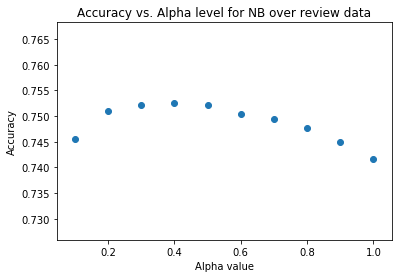

In [78]:
plt.scatter(df_thresh_acc[1:11].alpha, df_thresh_acc[1:11].acc)
plt.ylabel('Accuracy')
plt.xlabel('Alpha value')
plt.title('Accuracy vs. Alpha level for NB over review data')

plt.show()

# 7 Final model performance

In [80]:
df_test = pd.read_csv("C:\\Users\\Arihan Jalan\\INFO 371\\rotten-tomatoes-test.csv", sep='\t')
df_test = addFreshClass(cleanReviews(df_test))

In [81]:
arr_fresh_pred = myNBimplementation(0.4, df_train, df_test)
arr_fresh_true = df_test.fresh_yes

print("accuracy:", np.mean(arr_fresh_pred == arr_fresh_true))
print("Confusion Matrix: \n", confusion_matrix(arr_fresh_true, arr_fresh_pred))

del arr_fresh_pred
del arr_fresh_true

accuracy: 0.7620173364854216
Confusion Matrix: 
 [[ 706  268]
 [ 336 1228]]


Our best kNN had an accuracy of 69.26%, and TF-IDF of 60.00%. Naive Bayes with it's accuracy of 76.20% is better than both of them.